Attribution 4.0 International (CC BY 4.0)

https://creativecommons.org/licenses/by/4.0/

In [1]:
import pandas
print('pandas',pandas.__version__)
import glob
import pickle
import numpy
import seaborn
import time
import datetime
import matplotlib.pyplot as plt

pandas 0.23.4


In [2]:
list_of_dat = glob.glob('data_synthesized_from_csvs/count_of_models_per_day/count_of_models_on_*.dat')
print(len(list_of_dat))

2088


In [3]:
list_of_df=[]
for path_to_dat in list_of_dat:
    date_str = path_to_dat[:-len('.dat')].split('_')[-1]
    date_as_dt = datetime.datetime.strptime(date_str, '%Y-%m-%d')
#    print(path_to_dat)
    df = pandas.read_csv(path_to_dat,header=None)
    df.columns=[date_as_dt,'model']
    df=df.set_index('model')
    list_of_df.append(df)

In [4]:
df = pandas.concat(list_of_df,sort=False,axis=1) # join all the dataframes into a single df
df = df.reindex(sorted(df.columns), axis=1) # order columns by calendar date

In [5]:
df.shape

(113, 2088)

In [21]:
sorted_df = df.loc[df.sum(axis=1).sort_values(ascending=False).index]

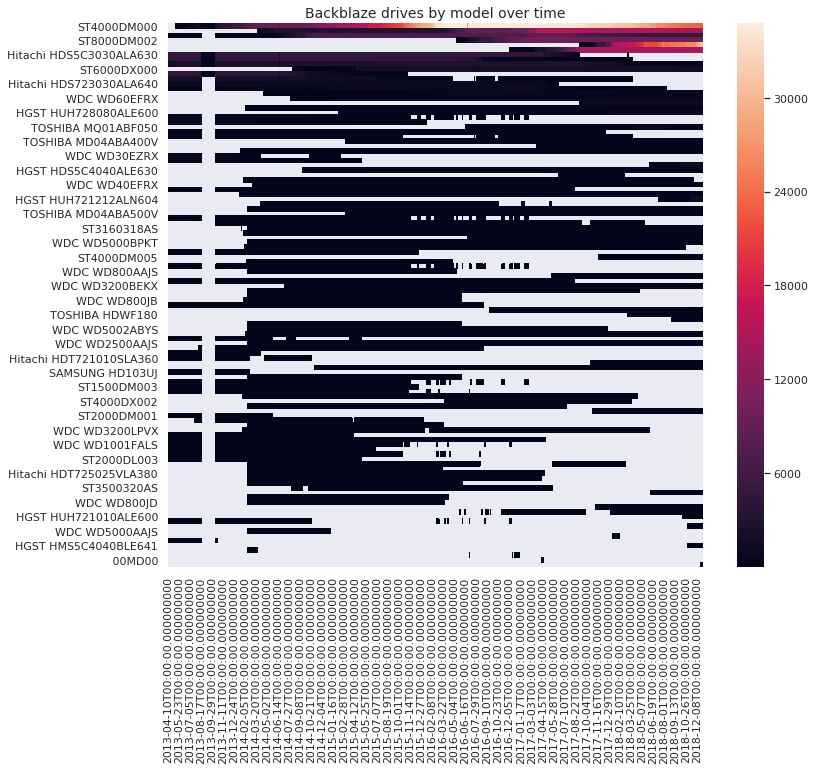

In [27]:
seaborn.set(rc={'figure.figsize':(12,10)})
seaborn.heatmap(sorted_df);
plt.title('Backblaze drives by model over time',fontsize=14);